# 🎈 인스타그램 태그

In [1]:
import requests
from bs4 import BeautifulSoup
from  selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time as time
import getpass
import urllib.request
import random
import re
 
from time import sleep
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
path = 'C:\chromedriver_win32\chromedriver.exe'
driver = webdriver.Chrome(path)

In [3]:
driver.get("https://www.instagram.com/accounts/login/" )
instagram_id= getpass.getpass("Input ID : ")
instagram_pw= getpass.getpass("Input PWD : ")

_id = driver.find_element_by_name('username')
_id.send_keys(instagram_id)
time.sleep(2)

_password = driver.find_element_by_name('password')
_password.send_keys(instagram_pw)
time.sleep(2)

Input ID : ········
Input PWD : ········


In [4]:
login_button = driver.find_element_by_css_selector('.sqdOP.L3NKy.y3zKF').click()
time.sleep(5) # 로그인 버튼 누르기

driver.find_element_by_css_selector('.sqdOP.yWX7d.y3zKF').click()
time.sleep(3) # 로그인 저장 나중에

driver.find_element_by_css_selector('.aOOlW.HoLwm').click()
time.sleep(3) # 설정 나중에

## 태그 수집

In [7]:
_keyword = input("검색어를 입력하세요 : ")
word = str(_keyword) 
driver.get('https://www.instagram.com/explore/tags/' + _keyword + '/')

검색어를 입력하세요 : 대전유성


In [6]:
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click() #첫번째 게시물 열기
time.sleep(4)

In [7]:
tagCollect = []
count = 300
for i in range(count):
    data = driver.find_elements_by_css_selector('a.xil3i') # 해쉬태그 정보 저장
    for j in range(len(data)):
        tagCollect.append(data[j].text.replace("#","")) # '#'없애기

    driver.find_element_by_css_selector("div.l8mY4.feth3").click() #다음 게시물로 이동
    time.sleep(3)

## 필요없는 태그들 잘라내기

In [8]:
stop_words = ["전라남도나주시","광주","전라도","전라도여행","나주카페","광주광역시","나주맛집","먹스타그램","맛스타그램","광양핫플","전남맛집","광양맛집","전남광양","칠곡","경북칠곡","경북","유성맛집","대전맛집","인천","마곡동","양천구","서대문구","은평구맛집","강서구", "연신내", "맛집", "반사", "soulcoachingoraclecards","서울은평구", "은평구", "임실여행","전북여행","전북임실","문의01066389905","입양문의01066389905타미맘","논산시","논산맛집","논산가볼만한곳","충남논산","논산여행","남양사거리","남양네일","화성남양","남양읍","서귀포시","제주여행","여행","제주도가볼만한곳","제주살이","제주도민","jeju","제주도맛집","제주도","제주시맛집","제주도카페추천","제주도먹방","제주도민추천맛집","제주도현지인맛집","제주도스타그램","제주현지인맛집","제주시가볼만한곳","제주카페","제주도카페","제주시","제주맛집","갤럭시노트20울트라","부산맛집","인스타굿","맞좋아요","오후","첫줄반사","월요일","좋아요램","좋튀","댓글","소통해요","주말","그냥","오랜만","일요일","오늘","디엠","데일리","꿀주말","휴무","선팔","경주충효동", "맞팔","팔로우이벤트","참여이벤트","대구","일상","southkorea","경산남천", "파주시","파주카페","경상남도진주","진주시","안성여행","안성시","likeforlikes","경기도안성","부산여행","부산북구","코로나로나갈수없는요즘","경상북도경주","경주여행","친구","부모님","댓글이벤트","응원이벤트","이벤트","강원도여행", "태백시", "강원도태백", "나주여행","전남나주","나주시","전라남도나주", "전라남도광양","좋아요테러","팔로워","좋아요반사","선팔환영","팔로우환영","선팔좋아요","맞팔좋아요","좋아요","선팔하면맞팔","팔로","팔로우미","선팔하면맞팔가요","팔로우","팔로잉","팔로미","선팔맞팔","소통","맞팔환영","노은동","지족동","대전유성","카톡","충남일수","20세이상누구나","계룡일수","세종일수","논산일수","공주일수","비밀보장","대전일수","대전중구","대전당일대출","대전달돈","대전개인돈","대전유성구","대전대덕구","대전서구","대전동구","대전일수", "대전급전","경상북도경산시","맞팔", "울산","경기도파주", "경기도", "파주", "경상북도", "경북", "경산", "대전", "유성", "전라남도", "전남", "광양", "나주", "강원도", "태백", "경주", "부산", "부산광역시", "북구", "안성", "경상남도", "경남", "진주", "제주", "화성", "칠곡", "충청남도", "충남", "논산", "전라북도", "전북", "임실", "서울","서울광역시", "은평","부산광역시강서구", "부산광역시사상구", "부산광역시북구"]
tagMost = [ i for i in tagCollect if i not in stop_words ]

print(tagMost)


['오베르', '연차쓰고', '아빠병원갔다가', '방학중조카랑데이트', '월요일날가니조용', '사진찍기바쁨📸', '귀찮아하는조카', '집착중인이모님', '다시가보고싶은그런카페', '경주충효동맛집', '첫줄', '속쓰리다', '술안묵을껄', '아이고', '삼겹살', '맛있던데ㅋ', '경주도자기공방', '원데이클래스', '경주원데이', '경주원데이클래스', '경주어린이체험', '경주공방', '경주도자기', '경주취미생활', '경주키즈클래스', '흙공방', '경주물레체험', '경주키즈원데이클래스', '인터폴카페', '자몽에이드', '밀면시대', '경주밀면시대', '경주밀면', '물밀면', '비빔밀면', '맛ㅇㅅ듬❤️', '직원들너무친절', '술스타그램', '푸드스타그램', '경주추천', '숨은맛집', '경주맛집', '경주핫플', '경주맛집추천', '정성담은수제떡', '예쁘고맛있는', '건강한수제떡', '경주백일떡', '경주돌떡', '경주생일떡', '경주예쁜떡', '경주맛있는떡', '경주수제떡공방', '달그락수제이야기', '카페오베르', '밀크티', '딸기생크림크로와상', '윤안경', '인테리어', 'incellderm', '인셀덤', '인셀덤비에톤멀티스틱밤', '광채리프팅케어', '봄은언제오는가요', '봄을기다려요', '인셀덤이유민', '먹방', '먹팔', '먹부림', '먹스타', '먹스타그램🍴', '먹방투어', '맛집여행', '맛집투어', '경주맛집', '충효동맛집', '꽃게탕', '얼큰함이최고', '경주도자기공방', '경주취미생활', '도자기핸드페인팅', '원데이클래스', '세라워크경주점', '세라워크', '물레체험', '어린이체험', '경주어린이체험', '충효동', '도자기핸드페인팅기술사자격증', '경주시민', '핸드페인팅공방', '경주도자기', '경주취미', '벽장식', '벽장식소품', '경주도자기공방', '경주취미생활', '도자기핸드페인팅', '원데이클래스', '세라워크경주점', '세라워크', '물레체험', '어린이체험', '경주어린이체험', '충효동', 

## 시각화

<BarContainer object of 30 artists>

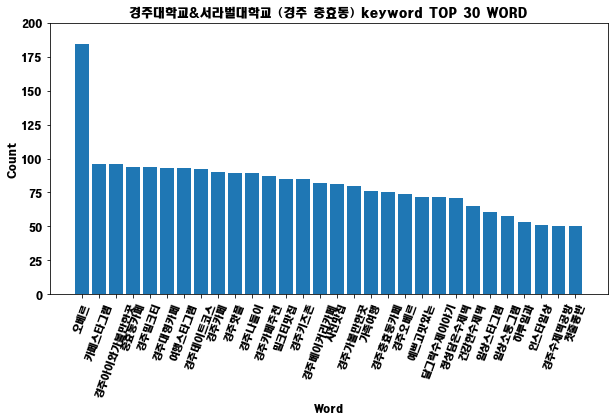

In [13]:
import nltk
 
results_str = " ".join(tagMost) # 결과값 list to string
tokens = results_str.split(" ") # 각 단어별로 떼어 내서
text = nltk.Text(tokens) # text에 저장하고
topWord = text.vocab().most_common(30) # 가장 많이 등장하는 30개의 단어를 추려낸다.
count = 30
xlist = [a[0] for a in topWord[:count ]]
ylist = [a[1] for a in topWord[:count ]]

# 한글 폰트 설정 ( 깨짐 방지 )
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\HMKMRHD.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
    
plt.figure(figsize = (10,5)) # 그래프 크기
plt.xlabel('Word') # X축
plt.xticks(rotation=70) # X축 라벨 회전
plt.ylabel('Count') # Y축
plt.title('경주대학교&서라벌대학교 (경주 충효동) '+'keyword TOP '+str(count)+' WORD')
plt.ylim([0, 200]) # 그래프의 Y축 크기 조절
plt.bar(xlist,ylist) # bar로 실행하면 막대그래프. plot으로 실행하면 꺾은선 그래프.



## wordcloud

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path="C:\Windows\Fonts\HMKMRHD.ttf",max_font_size=60).generate(results_str) # word cloud

(-0.5, 399.5, 199.5, -0.5)

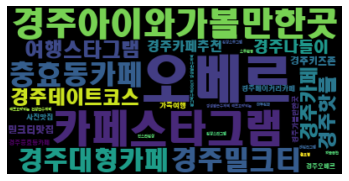

In [15]:
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 🎈게시글 위치정보

In [59]:
_keyword = input("검색어를 입력하세요 : ")
word = str(_keyword) 
driver.get('https://www.instagram.com/explore/tags/' + _keyword + '/')

검색어를 입력하세요 : 경상북도경주


In [60]:
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click() #첫번째 게시물 열기
time.sleep(5)

In [46]:
import re
from bs4 import BeautifulSoup

def get_content(driver):

    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')


    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ''

    # 3. 작성 일시, 좋아요 수 , 위치 정보 가져오기
    # 해쉬 태그는 정규 표현식을 이용해 가져온다.
    tags = re.findall(r'#[^\s#,\\]+', content)  

    #  작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]

    #  좋아요 수 가져오기
    # 예외처리구문.
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # 위치정보
    # 예외 처리구문
    try: 
        place = soup.select('div.M30cS')[0].text
    except:
        place = ''
    # 4. 저장하기
    data = [content, date, like, place, tags]
    return data

['', '2021-12-13', 0, '忍城', []]

In [48]:
def next_page(driver):
    next_page = driver.find_element_by_css_selector('div.l8mY4.feth3')
    next_page.click()
    time.sleep(3)
next_page(driver)

In [64]:
# 크롤링 결과를담을 리스트 생성
result = [ ]


# 여러 게시글 수집하기
target = 50      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result.append(data)
        next_page(driver)
    except:
        time.sleep(5)
        next_page(driver)

In [101]:
resultFrame = pd.DataFrame(result)
resultFrame[3].replace('', np.nan, inplace=True)
resultFrame[[3]].dropna(axis=0)

,3
0,경주 맷돌 순두부
1,경주 황리단길
2,경상북도 경주
3,경상북도 경주
5,경상북도 경주
6,경상북도 경주
7,경주 황리단길
8,경주 황리단길
9,경상북도 경주
12,셀세모


# 🎈 위치, 태그

In [14]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time as time
import getpass
import urllib.request
import random
import re

from time import sleep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/" + str(word)
    return url

def select_first(driver):
    driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click()  # 첫번째 게시물 열기
    time.sleep(5)

def get_content(driver):
    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')

    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div.e1e1d')[1].text
    except:
        content = ''

    # 3. 작성 일시, 좋아요 수 , 위치 정보 가져오기
    
    # 해시태그
    tags = soup.select('a.xil3i')

    # 작성일자
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]

    # 좋아요
    try :
        like = soup.select('a.zV_Nj')[0].text[4:-1]
    except :
        like = 0

    # 위치
    try :
        place = soup.select('div.M30cS')[0].text
    except :
        place = ''

    data = [content, date, like, place, tags]
    return data

def move_next(driver) :
    driver.find_element_by_css_selector("div.l8mY4.feth3").click()  # 다음 게시물로 이동
    time.sleep(3)

path = 'C:\chromedriver_win32\chromedriver.exe'
driver = webdriver.Chrome(path)

driver.get("https://www.instagram.com/accounts/login/" )
instagram_id= getpass.getpass("Input ID : ")
instagram_pw= getpass.getpass("Input PWD : ")

_id = driver.find_element_by_name('username')
_id.send_keys(instagram_id)
time.sleep(2)

_password = driver.find_element_by_name('password')
_password.send_keys(instagram_pw)
time.sleep(2)

login_button = driver.find_element_by_css_selector('.sqdOP.L3NKy.y3zKF').click()
time.sleep(5)

word = input('태그 입력 : ')
word = str(word)
url = insta_searching(word)

driver.get(url)
time.sleep(8)

select_first(driver)

results = []
target = 300
for i in range(target):

    try :
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except :
        time.sleep(2)
        move_next(driver)

results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']

Input ID : ········
Input PWD : ········
태그 입력 : 경북칠곡


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 원본데이터

In [16]:
results_df

NameError: name 'results_df' is not defined

## 가공 데이터 1

In [16]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max.colwidth', 1000)

results_df2 = results_df.set_index("place")
results_df3 = results_df2[["tags"]]
results_df3

,tags
place,
,"[[#사지마세요입양하세요], [#평생가족찾아요], [#경북칠곡], [#칠곡유기견], [#유기견입양]]"
,"[[#경북칠곡], [#학선정]]"
,"[[#팀아카데미], [#경북칠곡], [#김해삼정브랜치], [#리만코리아], [#W본부], [#청주인셀덤], [#인셀덤장은형]]"
경상북도 칠곡,[[#복만네]]
,"[[#사지마세요입양하세요], [#평생가족찾아요], [#경북칠곡], [#칠곡유기견], [#유기견입양], [#강아지], [#강아지입양], [#유기견], [#보호소입양], [#가족이되어주세요], [#adoptdog]]"
,"[[#경북칠곡], [#학선정], [#칠곡맛집], [#칠곡카페], [#칠곡맛집추천], [#칠곡카페추천], [#경북칠곡], [#경북칠곡군], [#칠곡군], [#경북칠곡맛집], [#경북칠곡카페], [#경북칠곡데이트], [#칠곡데이트], [#대구근교가족나들이], [#대구근교가족여행]]"
지천,"[[#경북칠곡], [#학선정☘️], [#대구], [#대구맛집], [#대구카페], [#동대구역], [#대구여행], [#대구맘], [#동성로], [#동성로맛집], [#동성로카페], [#두류공원], [#칠곡], [#성서], [#수성구], [#달서구], [#경북대], [#계대], [#영대], [#대구핫플], [#대구fc], [#김광석거리], [#동대구역], [#삼덕동], [#앞산], [#수성못맛집], [#서문시장], [#수성못], [#삼성라이온즈], [#이월드], [#김광석거리맛집]]"
,"[[#아베마리아], [#아마추어사진작가], [#대블리카파], [#대성스럽다], [#소박한사진관], [#캐논], [#캐논이미지스토밍], [#캐논베스트샷], [#캐논80d], [#캐논6d], [#경북칠곡], [#가실성당], [#나잡아봐라🏃], [#사진취미], [#스냅], [#스냅사진], [#인물사진], [#일반인모델], [#감성사진], [#좋반], [#맞팔], [#참좋았다], [#canon], [#snap], [#photo], [#ig_korea], [#photography], [#cathedral], [#maria], [#chillgok]]"
,"[[#경북칠곡], [#학선정], [#칠곡캠핑], [#칠곡캠핑장], [#칠곡펜션], [#칠곡가볼만한곳], [#칠곡데이트], [#칠곡데이트코스], [#칠곡애견동반]]"


## 어떤 지역이 가장 많이 count 되었는지

In [17]:
results_df.groupby(by=['place'], as_index=False).count().sort_values(by='tags', ascending=False)

,place,content,date,like,tags
0,,203,203,203,203
10,경상북도 칠곡,23,23,23,23
2,가산수피아,12,12,12,12
6,경북 칠곡군 북삼읍,10,10,10,10
5,경북 칠곡군,6,6,6,6
15,대구,5,5,5,5
27,칠곡 동명면,3,3,3,3
18,엠비언트,3,3,3,3
35,학수고대마을,2,2,2,2
13,꿀벌나라테마공원,2,2,2,2


## 지역별로 추출

In [24]:
condition = (results_df.place == '경북 칠곡군')
results_df4 = results_df.loc[condition, ['place', 'tags']]
results_df4


,place,tags
46,경북 칠곡군,[]
58,경북 칠곡군,"[[#경북칠곡], [#칠곡군동명면], [#칠곡카페], [#칠곡핫플], [#대구팔공산], [#카페], [#커피명가], [#동명저수지], [#커피명가동명레이크점], [#딸기케이크], [#커피명가딸기케익]]"
204,경북 칠곡군,"[[#경북칠곡], [#학선정], [#칠곡맛집], [#칠곡카페], [#칠곡맛집추천], [#칠곡카페추천], [#경북칠곡], [#경북칠곡군], [#칠곡군], [#경북칠곡맛집], [#경북칠곡카페], [#경북칠곡데이트], [#칠곡데이트], [#대구근교가족나들이], [#대구근교가족여행]]"
213,경북 칠곡군,"[[#경북칠곡], [#블루닷], [#가는길], [#정해인]]"
275,경북 칠곡군,"[[#NeverForget], [#NextGeneration], [#Koreawar], [#Koreawarveterans], [#USRokAlliance], [#625전쟁], [#한국전쟁], [#한미동맹], [#경북], [#경북칠곡], [#왜관], [#낙동강], [#호국기념박물관], [#왜관초등학교], [#다음세대], [#보수주의]]"
282,경북 칠곡군,"[[#이건창호], [#세컨하우스], [#경북칠곡], [#이건창호], [#이건창호시공], [#아키페이스], [#한우건축자재]]"


In [25]:
results_df4.drop([results_df4.index[0],results_df4.index[0]])

,place,tags
58,경북 칠곡군,"[[#경북칠곡], [#칠곡군동명면], [#칠곡카페], [#칠곡핫플], [#대구팔공산], [#카페], [#커피명가], [#동명저수지], [#커피명가동명레이크점], [#딸기케이크], [#커피명가딸기케익]]"
204,경북 칠곡군,"[[#경북칠곡], [#학선정], [#칠곡맛집], [#칠곡카페], [#칠곡맛집추천], [#칠곡카페추천], [#경북칠곡], [#경북칠곡군], [#칠곡군], [#경북칠곡맛집], [#경북칠곡카페], [#경북칠곡데이트], [#칠곡데이트], [#대구근교가족나들이], [#대구근교가족여행]]"
213,경북 칠곡군,"[[#경북칠곡], [#블루닷], [#가는길], [#정해인]]"
275,경북 칠곡군,"[[#NeverForget], [#NextGeneration], [#Koreawar], [#Koreawarveterans], [#USRokAlliance], [#625전쟁], [#한국전쟁], [#한미동맹], [#경북], [#경북칠곡], [#왜관], [#낙동강], [#호국기념박물관], [#왜관초등학교], [#다음세대], [#보수주의]]"
282,경북 칠곡군,"[[#이건창호], [#세컨하우스], [#경북칠곡], [#이건창호], [#이건창호시공], [#아키페이스], [#한우건축자재]]"


# 엑셀 파일로 넘기기

In [1]:
# 매개 변수로 저장할 파일 이름을 전달합니다.
results_df4.to_excel('웅지세무대(경기도파주)-퍼스트가든.xlsx',index=False)

NameError: name 'results_df4' is not defined